# ***Driving Insights:“ Stress Detection via Heartbeat Big data  Analytics through RNN ”***


---
*   Sadia Adrees
*   Shaher Bano
*   Izza Zafar
---





## Normal = Not Stress
## Abnormal = Stress


### Libararies Import

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Read DataSet**

In [ ]:
dfs = [pd.read_csv('/content/drive/MyDrive/Dataset/ptbdb_' + x + '.csv') for x in ['normal', 'abnormal']]

List
* 0 = normal
* 1 = Abnormal

In [ ]:
#normal
dfs[0]

,1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4040,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4041,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4043,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#abnormal
dfs[1]

,9.322328567504882812e-01,8.696785569190979004e-01,8.861859440803527832e-01,9.296264052391052246e-01,9.087749719619750977e-01,9.339704513549804688e-01,8.010425567626953125e-01,7.497828006744384766e-01,6.872285008430480957e-01,6.350998878479003906e-01,...,0.000000000000000000e+00.117,0.000000000000000000e+00.118,0.000000000000000000e+00.119,0.000000000000000000e+00.120,0.000000000000000000e+00.121,0.000000000000000000e+00.122,0.000000000000000000e+00.123,0.000000000000000000e+00.124,0.000000000000000000e+00.125,1.000000000000000000e+00.1
0,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10500,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10501,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10502,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10503,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#rename the dataframes columns  of both normal and abnormal
for df in dfs:
    df.columns = list(range(len(df.columns)))

In [ ]:
dfs[0]

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4040,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4041,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4043,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# We concate both the dataframe into one
data = pd.concat(dfs, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
data = data.rename({187: 'Label'}, axis=1)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,Label
0,1.000000,0.887073,0.774146,0.713224,0.682021,0.699851,0.595840,0.552749,0.469539,0.481426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.684376,0.395907,0.288863,0.262102,0.231405,0.234160,0.218811,0.207399,0.212121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.645543,0.270195,0.089833,0.038997,0.064067,0.045265,0.062674,0.059192,0.057799,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.995881,0.993821,0.959835,0.872297,0.542739,0.054583,0.000000,0.098867,0.156540,0.302781,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.996020,0.323383,0.109453,0.035821,0.264677,0.342289,0.367164,0.402985,0.401990,0.420896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14545,1.000000,0.979786,0.621879,0.146849,0.000000,0.266944,0.356718,0.421522,0.450059,0.457788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14546,1.000000,0.648015,0.424677,0.315160,0.223816,0.156384,0.156863,0.122908,0.093735,0.122908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14547,0.931217,1.000000,0.465201,0.150183,0.035409,0.033374,0.049247,0.070818,0.078958,0.087505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14548,1.000000,0.588291,0.120570,0.056962,0.136076,0.181646,0.182595,0.185759,0.178481,0.186076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


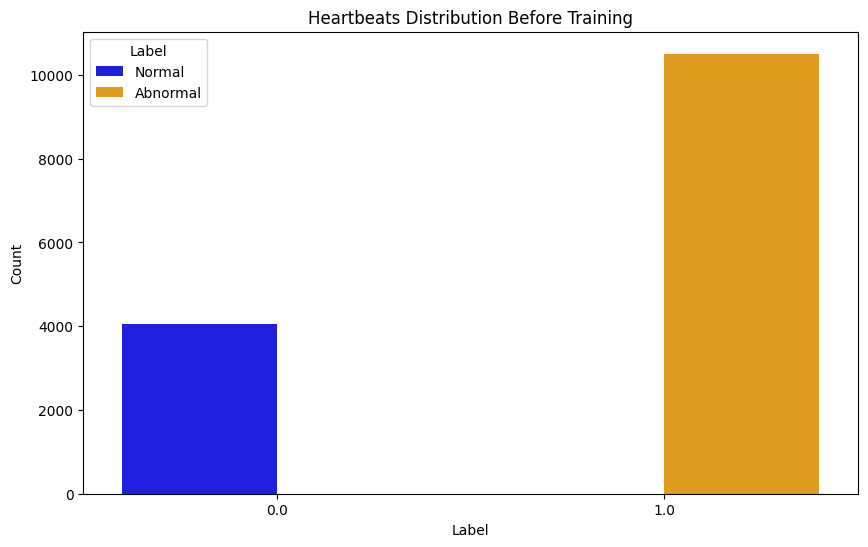

In [ ]:
# Display bar chart of heartbeats distribution before training
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=data, hue='Label', palette={0: 'blue', 1: 'orange'})
plt.title('Heartbeats Distribution Before Training')
plt.xlabel('Label')
plt.ylabel('Count')
plt.legend(title='Label', labels=['Normal', 'Abnormal'])
plt.show()

# Preprocessing

In [ ]:
y = data['Label'].copy()
X = data.drop('Label', axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
8540,1.000000,0.834705,0.358711,0.163923,0.096708,0.100137,0.137860,0.131001,0.131001,0.147462,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
10734,1.000000,0.783220,0.479365,0.206803,0.010884,0.078912,0.107937,0.113832,0.116553,0.113832,...,0.063492,0.070748,0.094785,0.142404,0.149206,0.155102,0.0,0.0,0.0,0.0
13652,1.000000,0.789198,0.247764,0.000000,0.039662,0.105148,0.115274,0.105654,0.109030,0.108017,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5014,1.000000,0.783092,0.592754,0.418357,0.347826,0.314976,0.289372,0.275362,0.267150,0.276812,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
11630,0.990495,0.670835,0.302151,0.000000,0.068534,0.074537,0.141571,0.253127,0.309155,0.310155,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1.000000,0.668866,0.334133,0.069586,0.106179,0.244151,0.262148,0.238152,0.240552,0.246551,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5192,0.970892,0.406573,0.051643,0.065728,0.184038,0.205634,0.238498,0.227230,0.234742,0.271362,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
12172,1.000000,0.770696,0.600526,0.543364,0.500657,0.496058,0.500657,0.523653,0.519054,0.520368,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
235,1.000000,0.814031,0.646993,0.079065,0.063474,0.122494,0.208241,0.231626,0.263920,0.279510,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [ ]:
y_train

8540     0.0
10734    0.0
13652    0.0
5014     1.0
11630    1.0
        ... 
905      1.0
5192     1.0
12172    1.0
235      1.0
13349    1.0
Name: Label, Length: 10185, dtype: float64

# Training

In [ ]:

#shape of array  (row , col)
X_train.shape
# tf.expand_dims(X_train , axis=2).shape
# for that we will expand the dimentaions as gru required the input should b 3 dimentional because it accounts for each input being multi being a two dimentional as we have 1d input so we convert it into 3d by expanding it for the given feature

(10185, 187)

In [ ]:
#model train  by RNN

inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand = tf.expand_dims(inputs, axis=2) # expanding it on axis= 2 means 3D
gru = tf.keras.layers.GRU(256, return_sequences=True)(expand)
flatten = tf.keras.layers.Flatten()(gru)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(flatten)


model = tf.keras.Model(inputs=inputs, outputs=outputs)

#SUMMARY OF THE MODEL
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 187)]             0         
                                                                 
 tf.expand_dims (TFOpLambda  (None, 187, 1)            0         
 )                                                               
                                                                 
 gru (GRU)                   (None, 187, 256)          198912    
                                                                 
 flatten (Flatten)           (None, 47872)             0         
                                                                 
 dense (Dense)               (None, 1)                 47873     
                                                                 
Total params: 246785 (964.00 KB)
Trainable params: 246785 (964.00 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________

In [ ]:
#mode optimization regression control to not over fitting
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', # for binary classification problem
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')   # auc is better to understad how each model is doing in each class
    ]
)

    # fit our model in the history
    # because we do not want the training loss completely because most of the time it just over fitting the model
history = model.fit (
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(  # early stoping allow us to monitor a given  value for validation
            monitor='val_loss',
            patience=5,  # we will wait for 5 epochs if it not validating else we gonna stop the training and restore the weight from the best epoch
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
255/255 [==============================] - 117s 448ms/step - loss: 0.4603 - accuracy: 0.7725 - auc: 0.8156 - val_loss: 0.4180 - val_accuracy: 0.8051 - val_auc: 0.8595
Epoch 2/100
255/255 [==============================] - 119s 468ms/step - loss: 0.4072 - accuracy: 0.8046 - auc: 0.8641 - val_loss: 0.3682 - val_accuracy: 0.8257 - val_auc: 0.8914
Epoch 3/100
255/255 [==============================] - 115s 452ms/step - loss: 0.3641 - accuracy: 0.8309 - auc: 0.8930 - val_loss: 0.3518 - val_accuracy: 0.8463 - val_auc: 0.9022
Epoch 4/100
255/255 [==============================] - 115s 450ms/step - loss: 0.3315 - accuracy: 0.8517 - auc: 0.9135 - val_loss: 0.3334 - val_accuracy: 0.8591 - val_auc: 0.9193
Epoch 5/100
255/255 [==============================] - 111s 437ms/step - loss: 0.3072 - accuracy: 0.8700 - auc: 0.9266 - val_loss: 0.3238 - val_accuracy: 0.8743 - val_auc: 0.9278
Epoch 6/100
255/255 [==============================] - 120s 472ms/step - loss: 0.2742 - accuracy: 0.8882 

KeyboardInterrupt: ignored

# Results

In [ ]:
results = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
print("Test Accuracy: {:.2f}%".format(results[1] * 100))
print("     Test AUC: {:.4f}".format(results[2]))

## Test the model

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_pred_binary = (y_pred > 0.5).astype(int)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'Label' column has values 0 and 1
label_mapping = {0: 'Normal', 1: 'Abnormal'}

# Convert NumPy array to Pandas Series
y_pred_series = pd.Series(y_pred_binary.flatten())

# Create a new column named 'Predicted_Label_Text'
data['Predicted_Label_Text'] = y_pred_series.map(label_mapping)

# Convert to string and handle NaN values
data['Predicted_Label_Text'] = data['Predicted_Label_Text'].astype('str')

# Convert 'Predicted_Label_Text' to categorical with correct order
data['Predicted_Label_Text'] = pd.Categorical(data['Predicted_Label_Text'], categories=['Normal', 'Abnormal'], ordered=True)

# Bar chart of heartbeats distribution after training
plt.figure(figsize=(10, 6))

# Use 'hue_order' to ensure consistent order in the legend
sns.countplot(x='Predicted_Label_Text', data=data, hue='Predicted_Label_Text')

plt.title('Heartbeats Distribution After Training')
plt.xlabel('Predicted Label')
plt.ylabel('Count')
plt.legend(title='Predicted Label')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_pred contains the model predictions
# Assuming X_test contains the test data

# Calculate prediction scores
y_pred_scores = model.predict(X_test)

# Assuming y_pred_binary contains the binary predictions
y_pred_binary = (y_pred_scores > 0.5).astype(int)

# Extract indices where the predicted label is 'Normal'
normal_indices = np.where(y_pred_binary == 0)[0]

# Create a heatmap using seaborn
plt.figure(figsize=(15, 5))
sns.heatmap(y_pred_scores.T, cmap="coolwarm", annot=True, fmt=".2f", xticklabels=1, yticklabels=False)
plt.scatter(normal_indices, [0] * len(normal_indices), color='red', marker='x', label='Predicted Normal')
plt.axhline(0, color='black', linestyle='--', linewidth=2, label='Threshold')
plt.title('Model Prediction Scores for Heartbeats')
plt.xlabel('Data Point Index')
plt.ylabel('Prediction Score')
plt.legend()
plt.show()


## Classification Report

In [ ]:
y_test.unique() #random

In [ ]:
from sklearn.utils.multiclass import unique_labels
unique_labels(y_test) # lower to higher >> sort

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

# Confusion Matrix

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Assuming you have already obtained y_pred_binary and y_test
# Replace these variables with your actual predictions and true labels

# Define class names
class_names = ['Normal', 'Abnormal']

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Create a heatmap using seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

# Show the plot
plt.show()
